# Create the word2vec embeddings

In [1]:
import pandas as pd
import numpy as np
import word2vec

In [2]:
reload(word2vec)
path = '/eos/user/l/llayer/AIErrorLogAnalysis/data/prefilter/'
tokens = word2vec.load_tokens(path)
tokens = pd.concat(tokens)

['tokens0.h5', 'tokens1.h5', 'tokens10.h5', 'tokens2.h5', 'tokens3.h5', 'tokens4.h5', 'tokens5.h5', 'tokens6.h5', 'tokens7.h5', 'tokens8.h5', 'tokens9.h5', 'vocab.h5']
tokens0.h5
tokens1.h5
tokens10.h5
tokens2.h5
tokens3.h5
tokens4.h5
tokens5.h5
tokens6.h5
tokens7.h5
tokens8.h5
tokens9.h5


In [3]:
tokens.head()

,task_name,error,site,exit_codes,error_msg,error_type,steps_counter,names,peakvaluerss,peakvaluevsize,...,TotalInitTime,AvgEventTime,NumberOfThreads,MinEventCPU,MaxEventTime,TotalJobTime,TotalLoopCPU,MinEventTime,MaxEventCPU,_c0
0,/fabozzi_Run2016F-v1-MuonEG-07Aug17_8029_17083...,85,T2_US_Purdue,99999,"[Could, not, find, report, file, for, step, st...",ReportManipulatingError,0,stageOut1,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,101202
1,/fabozzi_Run2016F-v1-MuonEG-07Aug17_8029_17083...,85,T2_US_Purdue,85,"[Adding, last, 25, lines, of, CMSSW, stdout, 3...",CMSSWStepFailure,2,cmsRun1,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,0.0,305.697,105.517,1000000.0,-1.0,101202
2,/fabozzi_Run2016F-v1-MuonEG-07Aug17_8029_17083...,85,T2_US_Purdue,8021,"[An, exception, of, category, FileReadError, o...",Fatal Exception,2,cmsRun1,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,0.0,305.697,105.517,1000000.0,-1.0,101202
3,/fabozzi_Run2016F-v1-MuonEG-07Aug17_8029_17083...,85,T2_US_Purdue,99999,"[Adding, extra, error, in, order, to, hold, er...",ErrorLoggingAddition,2,cmsRun1,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,0.0,305.697,105.517,1000000.0,-1.0,101202
4,/fabozzi_Run2016G-v1-DoubleMuonLowMass-07Aug17...,85,T2_US_Florida,99999,"[Could, not, find, report, file, for, step, st...",ReportManipulatingError,0,stageOut1,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,336353


In [4]:
len(tokens)

438866

In [5]:
reload(word2vec)
word2index = word2vec.run_word2vec(tokens)

Run the word2vec


NameError: global name 'word2index' is not defined

## Visualize the messages

In [40]:
path = '/eos/user/l/llayer/AIErrorLogAnalysis/data/word2vec'
tokens = pd.read_hdf(path + 'tokens_index_avg.h5')

In [6]:
tokens = tokens.drop([ 'error_msg_tokenized' ], axis=1)

In [7]:
tokens.head()

,task_name,error,site,exit_codes,error_type,steps_counter,names,avg_w2v
0,/fabozzi_Run2016F-v1-MuonEG-07Aug17_8029_17083...,85,T2_US_Purdue,99999,ReportManipulatingError,0,stageOut1,"[-0.6327675, 1.057197, 0.056380782, -0.3644849..."
1,/fabozzi_Run2016F-v1-MuonEG-07Aug17_8029_17083...,85,T2_US_Purdue,85,CMSSWStepFailure,2,cmsRun1,"[-0.43909624, 0.5063496, 0.60487694, -0.056146..."
2,/fabozzi_Run2016F-v1-MuonEG-07Aug17_8029_17083...,85,T2_US_Purdue,8021,Fatal Exception,2,cmsRun1,"[-1.0769646, 1.2356042, 0.88608974, 0.11158812..."
3,/fabozzi_Run2016F-v1-MuonEG-07Aug17_8029_17083...,85,T2_US_Purdue,99999,ErrorLoggingAddition,2,cmsRun1,"[-0.55738294, 0.87854844, 1.2031463, -0.585931..."
4,/fabozzi_Run2016G-v1-DoubleMuonLowMass-07Aug17...,85,T2_US_Florida,99999,ReportManipulatingError,0,stageOut1,"[-0.6327675, 1.057197, 0.056380782, -0.3644849..."


### T-SNE for the first message equal to the error code

In [17]:
tokens_first = tokens.drop_duplicates(subset=['task_name', 'site', 'error', 'exit_codes'])

In [20]:
tokens_first = tokens_first[tokens_first['exit_codes'] == tokens_first['error']]

In [32]:
tokens_first.head()

,task_name,error,site,exit_codes,error_type,steps_counter,names,avg_w2v
1,/fabozzi_Run2016F-v1-MuonEG-07Aug17_8029_17083...,85,T2_US_Purdue,85,CMSSWStepFailure,2,cmsRun1,"[-0.43909624, 0.5063496, 0.60487694, -0.056146..."
5,/fabozzi_Run2016G-v1-DoubleMuonLowMass-07Aug17...,85,T2_US_Florida,85,CMSSWStepFailure,2,cmsRun1,"[-0.604826, 0.32655057, 0.6754886, 0.21510972,..."
10,/fabozzi_Run2016G-v1-HTMHT-07Aug17_8029_170831...,50660,T0_CH_CERN,50660,PerformanceKill,0,PerformanceError,"[-0.40143496, 1.3093921, 0.39181262, -0.071760..."
17,/fabozzi_Run2016H-v1-DoubleEG-07Aug17_8029_170...,92,T2_UK_SGrid_RALPP,92,CMSSWStepFailure,2,cmsRun1,"[-0.51902694, 0.35659862, 0.7152039, 0.2219644..."
20,/fabozzi_Run2016H-v1-DoubleEG-07Aug17_8029_170...,50664,T2_IT_Rome,50664,PerformanceKill,0,PerformanceError,"[-0.25350407, 1.6643413, 1.004998, 0.15279588,..."


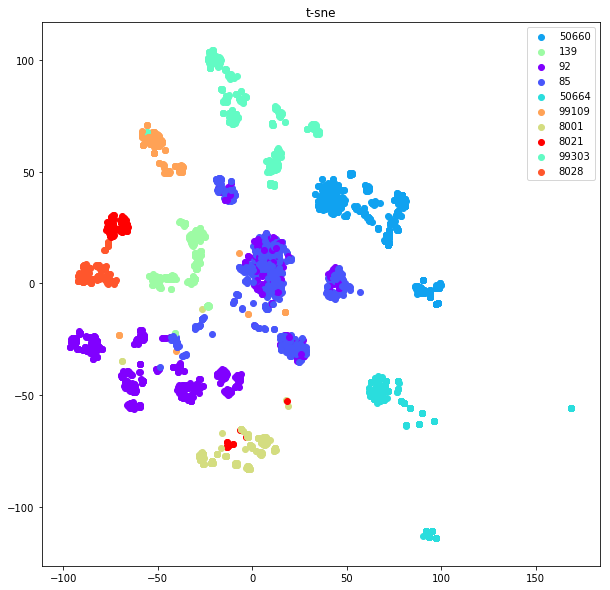

In [25]:
reload(w2v_analysis)
w2v_analysis.plot_tsne_error(tokens_first, 'error',  5000)

### T-SNE for the averaged messages per error code

In [41]:
tokens = tokens.groupby(['task_name', 'error', 'site'], as_index=False)['avg_w2v', 'error_type'].agg(lambda x: list(x))

In [42]:
tokens.head()

,task_name,error,site,avg_w2v,error_type
0,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,85,T1_UK_RAL,"[[-0.22462706, 0.29872724, 0.70934916, 0.11443...","[CMSSWStepFailure, Fatal Exception, ErrorLoggi..."
1,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,50664,T2_DE_RWTH,"[[-0.29832613, 1.5188409, 0.9002418, 0.0980547...","[PerformanceKill, CMSSWStepFailure, BadFWJRXML..."
2,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,50664,T2_DE_RWTH,"[[-0.29832613, 1.5188409, 0.9002418, 0.0980547...","[PerformanceKill, CMSSWStepFailure, BadFWJRXML..."
3,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,50664,T2_DE_RWTH,"[[-0.29832613, 1.5188409, 0.9002418, 0.0980547...","[PerformanceKill, CMSSWStepFailure, BadFWJRXML..."
4,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,99400,NoReportedSite,"[[-0.07633327, 1.014642, 0.13045293, 0.5291586...",[RemovedByGLIDEIN]


In [27]:
def average_message(message):
    
    return np.mean(np.array(message), axis = 0)

In [28]:
tokens['avg_w2v'] = tokens['avg_w2v'].apply(average_message)

In [31]:
tokens.head()

,task_name,error,site,avg_w2v
0,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,85,T1_UK_RAL,"[-0.64572215, 0.641289, 0.8480407, -0.05723635..."
1,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,50664,T2_DE_RWTH,"[-0.37116605, 0.5153855, 0.7909372, 0.03889961..."
2,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,50664,T2_DE_RWTH,"[-0.3702858, 0.5143405, 0.7953629, 0.039058268..."
3,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,50664,T2_DE_RWTH,"[-0.37136453, 0.51211816, 0.79105175, 0.035541..."
4,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,99400,NoReportedSite,"[-0.07633327, 1.014642, 0.13045293, 0.5291586,..."


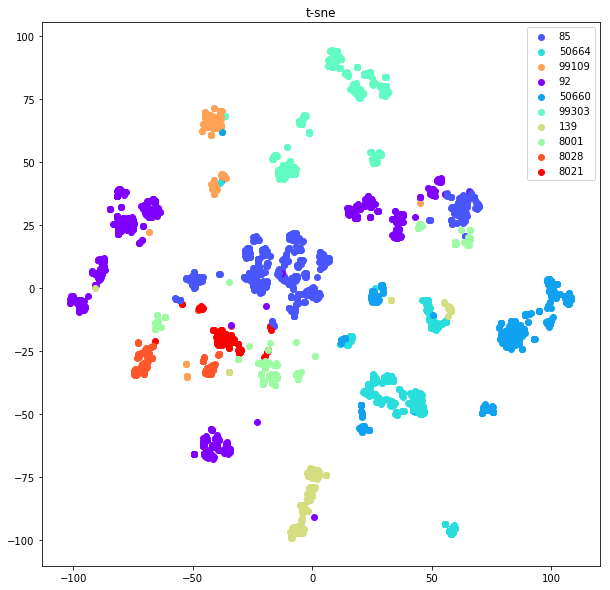

In [30]:
reload(w2v_analysis)
w2v_analysis.plot_tsne_error(tokens, 'error', 5000)

### T-SNE for the averaged workflow messages

In [34]:
tokens.head()

,task_name,error,site,avg_w2v
0,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,85,T1_UK_RAL,"[-0.64572215, 0.641289, 0.8480407, -0.05723635..."
1,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,50664,T2_DE_RWTH,"[-0.37116605, 0.5153855, 0.7909372, 0.03889961..."
2,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,50664,T2_DE_RWTH,"[-0.3702858, 0.5143405, 0.7953629, 0.039058268..."
3,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,50664,T2_DE_RWTH,"[-0.37136453, 0.51211816, 0.79105175, 0.035541..."
4,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,99400,NoReportedSite,"[-0.07633327, 1.014642, 0.13045293, 0.5291586,..."


In [35]:
tokens = tokens.groupby(['task_name'], as_index=False)['avg_w2v', 'error', 'site'].agg(lambda x: list(x))

In [36]:
tokens.head()

,task_name,avg_w2v,error,site
0,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,"[[-0.64572215, 0.641289, 0.8480407, -0.0572363...",[85],[T1_UK_RAL]
1,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,"[[-0.37116605, 0.5153855, 0.7909372, 0.0388996...",[50664],[T2_DE_RWTH]
2,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,"[[-0.3702858, 0.5143405, 0.7953629, 0.03905826...",[50664],[T2_DE_RWTH]
3,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,"[[-0.37136453, 0.51211816, 0.79105175, 0.03554...","[50664, 99400]","[T2_DE_RWTH, NoReportedSite]"
4,/amaltaro_Run2018A-v1-DoubleMuon-17Sep2018_102...,"[[-0.37750688, 0.5098932, 0.7995701, 0.0334445...",[50664],[T2_DE_RWTH]


In [37]:
tokens['avg_w2v'] = tokens['avg_w2v'].apply(average_message)

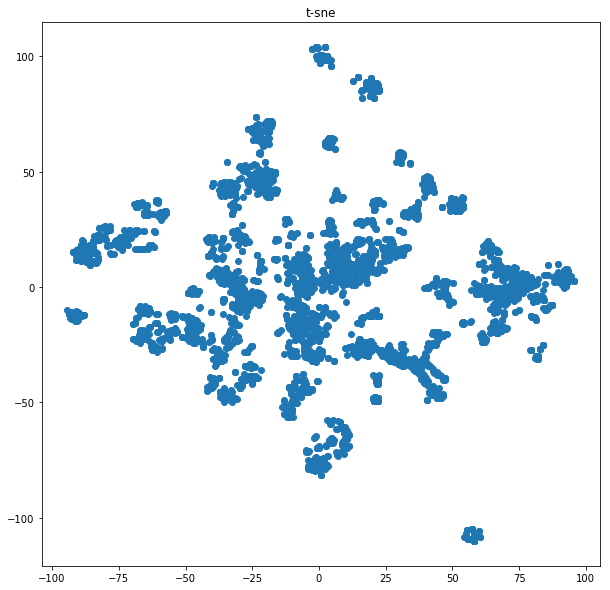

In [39]:
reload(w2v_analysis)
w2v_analysis.plot_tsne_wf(tokens, 5000)